<a href="https://colab.research.google.com/github/Prad0510/Learning-MachineVision/blob/main/MVision2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving image.jpeg to image.jpeg


In [3]:
img = cv2.imread(list(uploaded.keys())[0])

(np.float64(-0.5), np.float64(1279.5), np.float64(699.5), np.float64(-0.5))

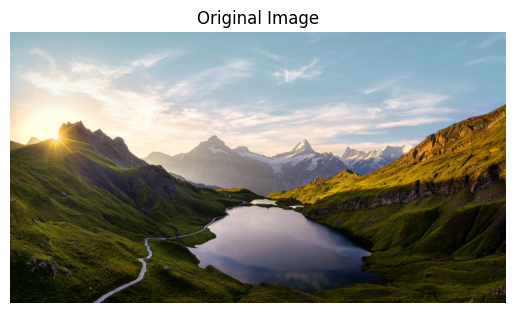

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

In [5]:
print("Image Type:", type(img))
print("Data Type (Pixel values):", img.dtype)
print("Image Shape (H, W, C):", img.shape)

Image Type: <class 'numpy.ndarray'>
Data Type (Pixel values): uint8
Image Shape (H, W, C): (700, 1280, 3)


In [7]:
from PIL import Image
image_path = list(uploaded.keys())[0]
pil_img = Image.open(image_path)
print("Image Format:", pil_img.format)
print("Image Mode:", pil_img.mode)
print("Image Size (WxH):", pil_img.size)

Image Format: JPEG
Image Mode: RGB
Image Size (WxH): (1280, 700)


In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

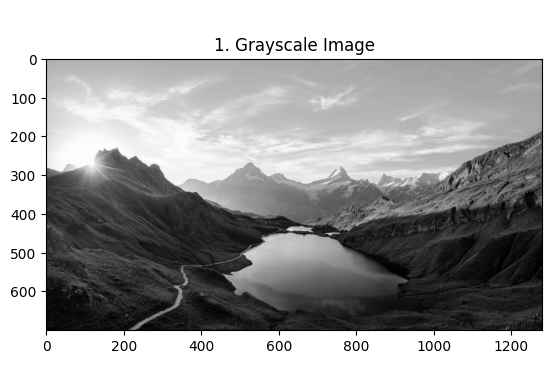

In [17]:
plt.imshow(gray, cmap='gray')
plt.title("1. Grayscale Image")
plt.subplot(1, 2, 1)
plt.axis('off')

In [10]:
print("Shape: ",gray.shape)
print("Total pixels: ",gray.size)
print("Min pixel: ",gray.min())
print("Max pixel: ",gray.max())

Shape:  (700, 1280)
Total pixels:  896000
Min pixel:  0
Max pixel:  254


/tmp/ipython-input-2949119120.py:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray.ravel(), 256, [0, 256], color='black')


Text(0, 0.5, 'Number of Pixels')

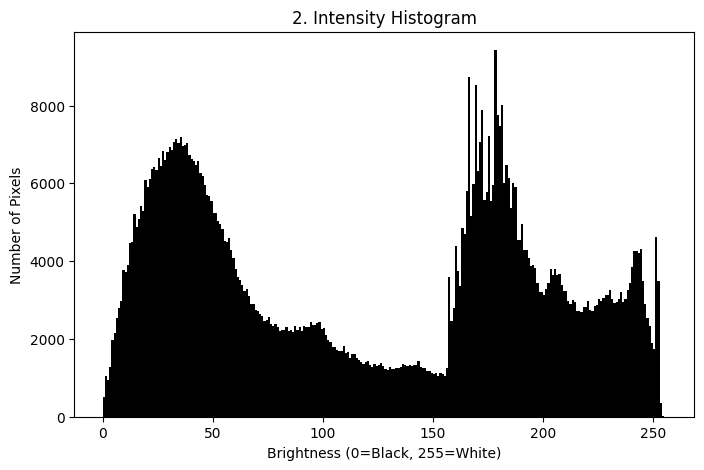

In [16]:
plt.figure(figsize=(8,5))
plt.hist(gray.ravel(), 256, [0, 256], color='black')
plt.title('2. Intensity Histogram')
plt.xlabel('Brightness (0=Black, 255=White)')
plt.ylabel('Number of Pixels')

In [18]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [19]:
blurred = cv2.blur(gray, (5, 5))

In [20]:
noise_map = cv2.absdiff(gray, blurred)

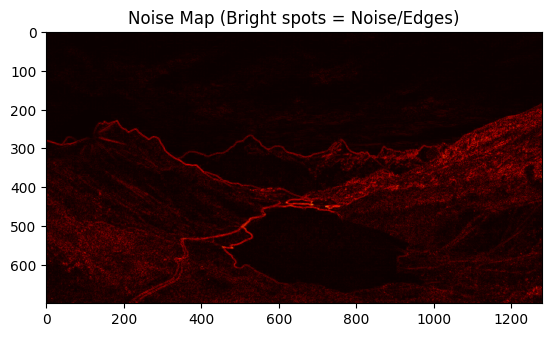

In [21]:
plt.imshow(noise_map, cmap='hot')
plt.title('Noise Map (Bright spots = Noise/Edges)')
plt.show()

In [24]:
gaussian_blur = cv2.GaussianBlur(gray, (5, 5), 0)

In [25]:
median_blur = cv2.medianBlur(gray, 5)

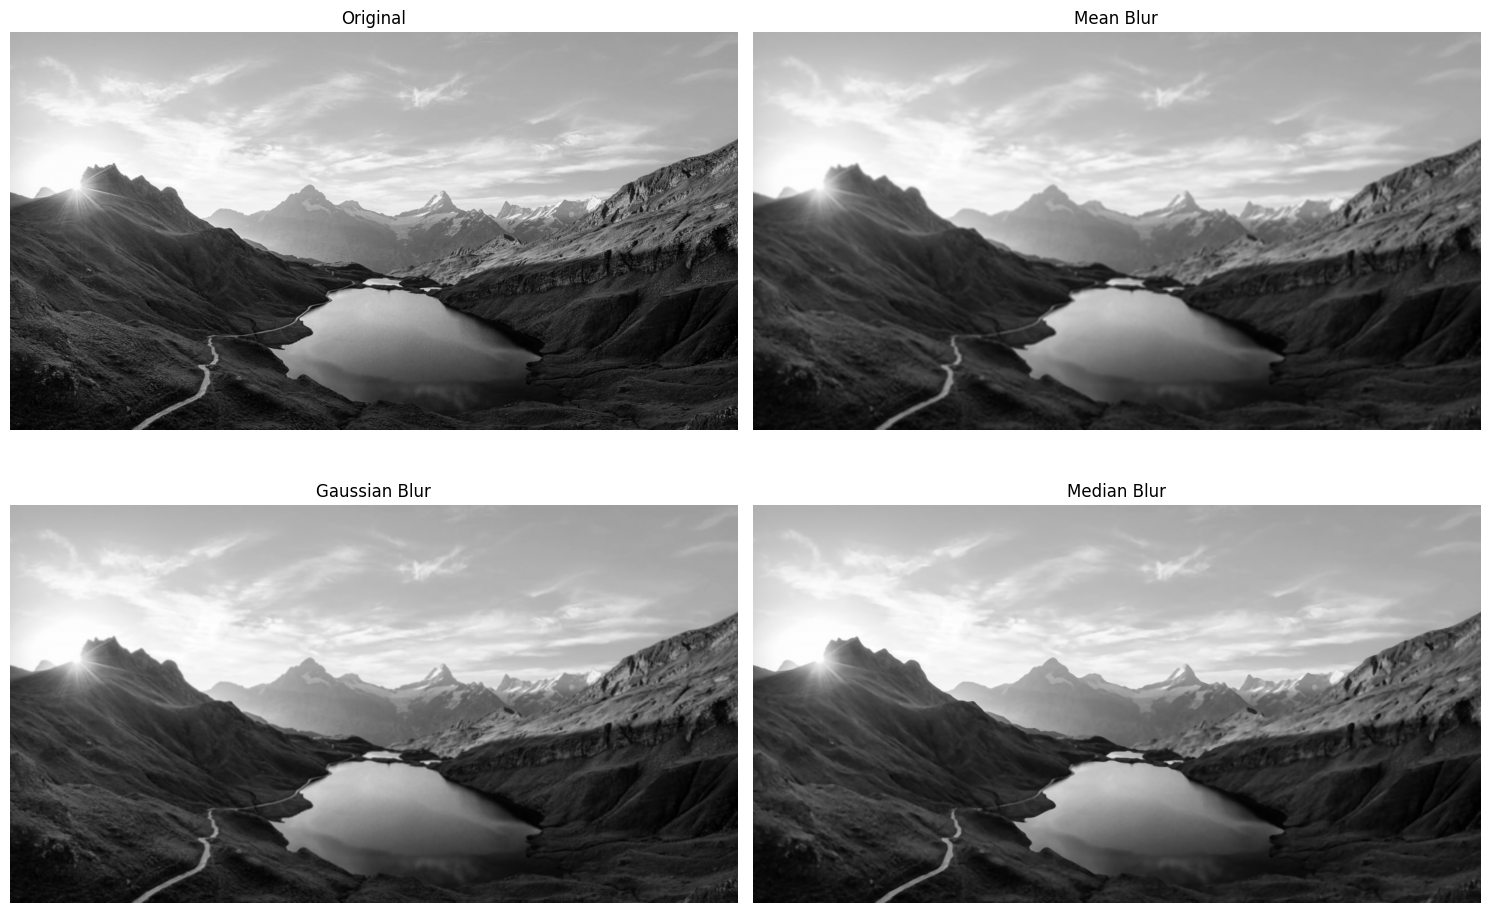

In [26]:
titles = ['Original', 'Mean Blur', 'Gaussian Blur', 'Median Blur']
images = [gray, blurred, gaussian_blur, median_blur]

plt.figure(figsize=(15, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [27]:
laplacian = cv2.Laplacian(gaussian_blur, cv2.CV_64F, ksize=3)
laplacian_8bit = cv2.convertScaleAbs(laplacian)

In [28]:
sharpened = cv2.addWeighted(gaussian_blur, 1.5, laplacian_8bit, -0.5, 0)

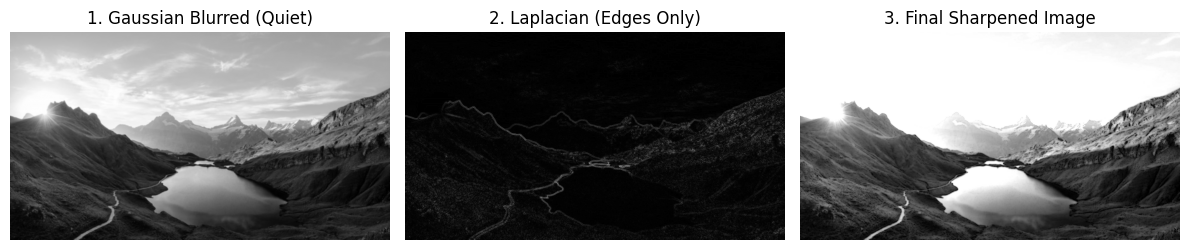

In [29]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(gaussian_blur, cmap='gray')
plt.title('1. Gaussian Blurred (Quiet)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian_8bit, cmap='gray')
plt.title('2. Laplacian (Edges Only)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened, cmap='gray')
plt.title('3. Final Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()

/tmp/ipython-input-723952021.py:3: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray.ravel(), 256, [0, 256], color='gray', alpha=0.7)
/tmp/ipython-input-723952021.py:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(sharpened.ravel(), 256, [0, 256], color='blue', alpha=0.7)


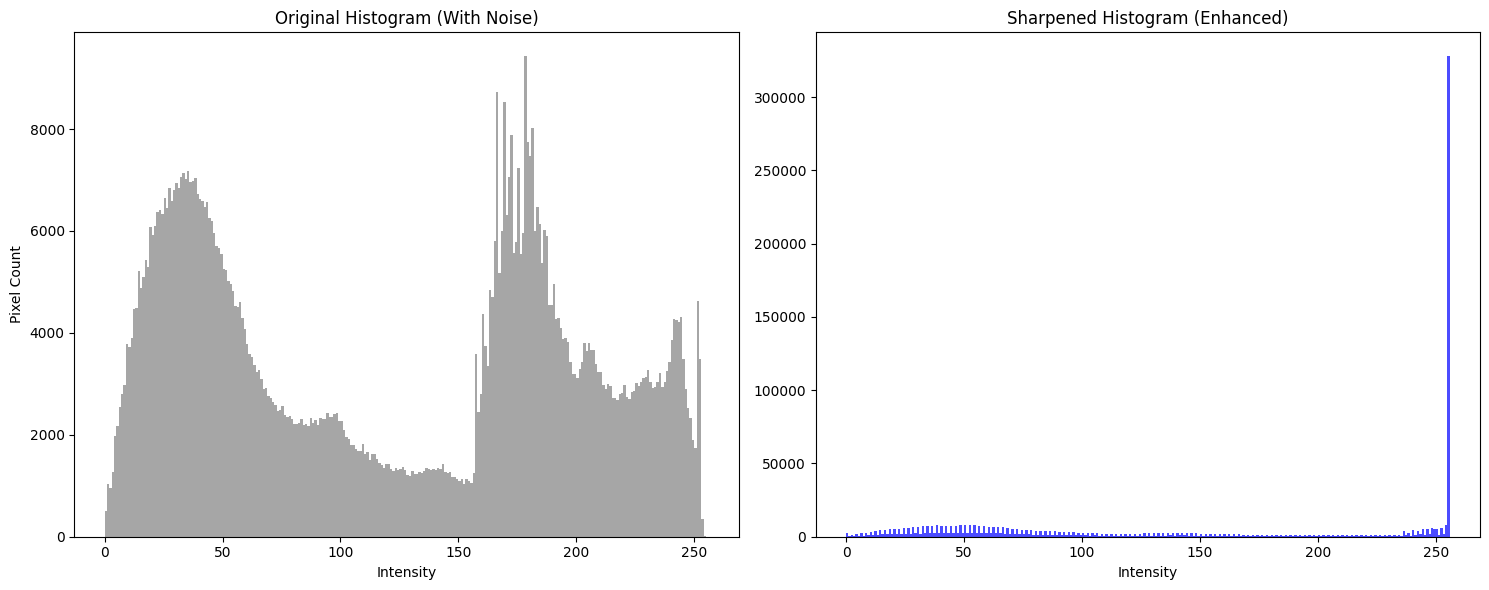

In [30]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.hist(gray.ravel(), 256, [0, 256], color='gray', alpha=0.7)
plt.title('Original Histogram (With Noise)')
plt.xlabel('Intensity')
plt.ylabel('Pixel Count')
plt.subplot(1, 2, 2)
plt.hist(sharpened.ravel(), 256, [0, 256], color='blue', alpha=0.7)
plt.title('Sharpened Histogram (Enhanced)')
plt.xlabel('Intensity')
plt.tight_layout()
plt.show()

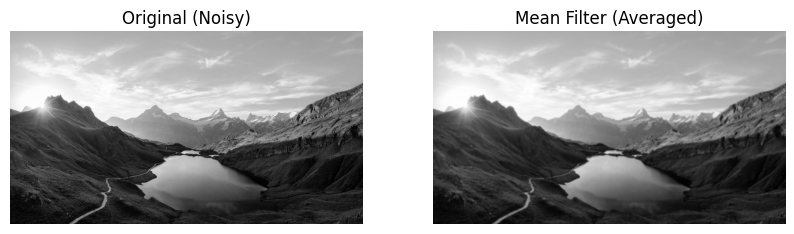

In [31]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original (Noisy)')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(blurred, cmap='gray')
plt.title('Mean Filter (Averaged)')
plt.axis('off')

plt.show()

In [32]:
laplacian_mean = cv2.Laplacian(blurred, cv2.CV_64F, ksize=3)
laplacian_8bit_mean = cv2.convertScaleAbs(laplacian_mean)

In [33]:
sharpened_mean = cv2.addWeighted(blurred, 1.5, laplacian_8bit_mean, -0.5, 0)

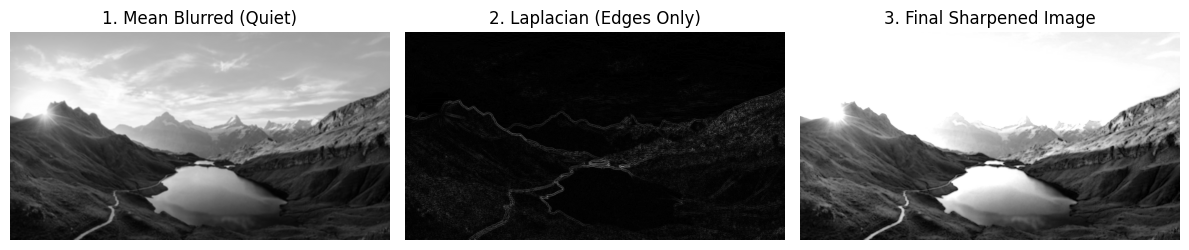

In [34]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(blurred, cmap='gray')
plt.title('1. Mean Blurred (Quiet)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian_8bit_mean, cmap='gray')
plt.title('2. Laplacian (Edges Only)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened_mean, cmap='gray')
plt.title('3. Final Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2959352705.py:3: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray.ravel(), 256, [0, 256], color='gray', alpha=0.7)
/tmp/ipython-input-2959352705.py:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(sharpened_mean.ravel(), 256, [0, 256], color='blue', alpha=0.7)


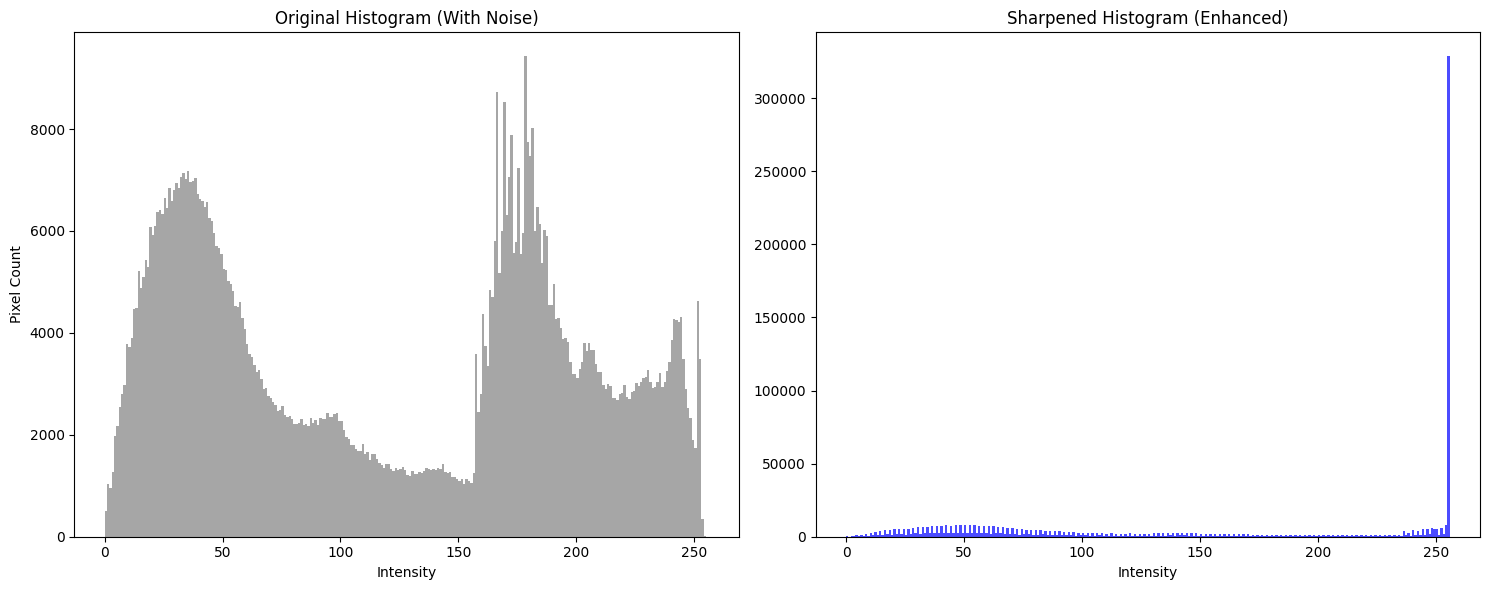

In [35]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.hist(gray.ravel(), 256, [0, 256], color='gray', alpha=0.7)
plt.title('Original Histogram (With Noise)')
plt.xlabel('Intensity')
plt.ylabel('Pixel Count')
plt.subplot(1, 2, 2)
plt.hist(sharpened_mean.ravel(), 256, [0, 256], color='blue', alpha=0.7)
plt.title('Sharpened Histogram (Enhanced)')
plt.xlabel('Intensity')
plt.tight_layout()
plt.show()